In [23]:
from archetypal import IDF

idf = IDF("badgeo.idf")


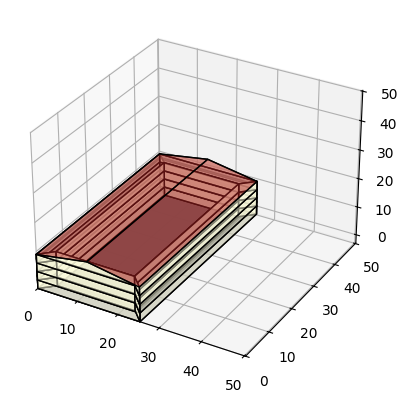

(<Figure size 640x480 with 1 Axes>, [<Axes3D: >])

In [24]:
idf.view_model()

67.12079999875277
141.82101899944246
67.12079999875277
141.82101899944246
857.7404312107931


['Block Perimeter_Zone_1 Storey 3 Roof 0001_1',
 'Block Perimeter_Zone_2 Storey 3 Roof 0001_1',
 'Block Perimeter_Zone_3 Storey 3 Roof 0001_1',
 'Block Perimeter_Zone_4 Storey 3 Roof 0001_1',
 'Block Core_Zone Storey 3 Roof 0001_1']

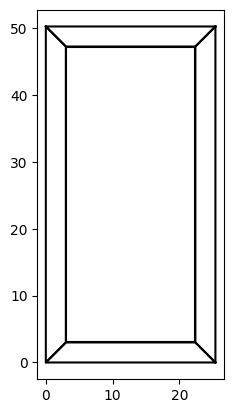

In [27]:
import matplotlib.pyplot as plt
from geomeppy.geom.polygons import Polygon2D

srfs = [
    srf
    for srf in idf.idfobjects["BUILDINGSURFACE:DETAILED"]
    if "attic" in srf.Zone_Name.lower() and srf.Surface_Type == "Floor"
]
srf_coords = [srf.coords for srf in srfs]
polys = [Polygon2D(coords) for coords in srf_coords]


fig, ax = plt.subplots()
for poly in polys:
    print(poly.area)
    x_coords = [coord[0] for coord in poly.vertices] + [poly.vertices[0][0]]
    y_coords = [coord[1] for coord in poly.vertices] + [poly.vertices[0][1]]
    ax.plot(x_coords, y_coords, color="black")
plt.gca().set_aspect("equal")
[srf.Outside_Boundary_Condition_Object for srf in srfs]

In [26]:
srfs[3]


BUILDINGSURFACE:DETAILED,
    attic_bottom_plane_3_1,    !- Name
    Floor,                    !- Surface Type
    Project Floor,            !- Construction Name
    Attic,                    !- Zone Name
    ,                         !- Space Name
    surface,                  !- Outside Boundary Condition
    Block Perimeter_Zone_4 Storey 3 Roof 0001_1,    !- Outside Boundary Condition Object
    NoSun,                    !- Sun Exposure
    NoWind,                   !- Wind Exposure
    autocalculate,            !- View Factor to Ground
    4,                        !- Number of Vertices
    0,                        !- Vertex 1 Xcoordinate
    50.27367299981415,        !- Vertex 1 Ycoordinate
    9,                        !- Vertex 1 Zcoordinate
    3,                        !- Vertex 2 Xcoordinate
    47.27367299981415,        !- Vertex 2 Ycoordinate
    9,                        !- Vertex 2 Zcoordinate
    3,                        !- Vertex 3 Xcoordinate
    3,                 